In [60]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [3]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [76]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


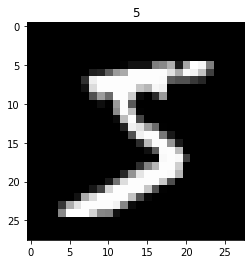

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [8]:
train_data.targets.shape

torch.Size([60000])

In [9]:
train_data.data.reshape(60000, 784)[0]/255.0 * 0.99+0.01

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 

In [59]:
X_train = train_data.data.reshape(60000, 784)/255.0 * 0.99+0.01
X_test = test_data.data.reshape(10000, 784)/255.0 * 0.99+0.01
Y_train = torch.nn.functional.one_hot(train_data.targets, num_classes=10)
# Encoding the categorical label for neural network  
Y_train_final=numpy.zeros((60000,10))+0.01
max_index = numpy.argmax(Y_train, axis=1)
for i in range(Y_train.shape[0]):
    Y_train_final[i, max_index[i]] = 0.09
y_test = numpy.array(test_data.targets)

In [11]:
Y_train_final[0]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.09, 0.01, 0.01, 0.01, 0.01])

In [7]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# neural network class definition
class cs3806_neuralNetwork:
    
    # initialise the neural network
    def __init__( self, inputnodes, hiddennodes, outputnodes, learningrate ):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train( self, inputs_list, targets_list ):
        # convert inputs list to 2d array
        inputs = numpy.array( inputs_list, ndmin=2 ).T
        targets = numpy.array( targets_list, ndmin=2 ).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot( self.wih, inputs )
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function( hidden_inputs )
        
        # calculate signals into final output layer
        final_inputs = numpy.dot( self.who, hidden_outputs )
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function( final_inputs )
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot( self.who.T, output_errors )
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot( (output_errors * final_outputs * (1.0 - final_outputs) ), numpy.transpose(hidden_outputs) )
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(( hidden_errors * hidden_outputs * ( 1.0 - hidden_outputs) ), numpy.transpose(inputs) )
        
        pass

    
    # query the neural network
    def query( self, inputs_list ):
        # convert inputs list to 2d array
        inputs = numpy.array( inputs_list, ndmin = 2 ).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot( self.wih, inputs )
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function( hidden_inputs )
        
        # calculate signals into final output layer
        final_inputs = numpy.dot( self.who, hidden_outputs )
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function( final_inputs )
        
        return final_outputs

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.1
learning_rate = 0.1

# create instance of neural network
n = cs3806_neuralNetwork( input_nodes,hidden_nodes,output_nodes, learning_rate )

# test query
#print( "the array is: ", n.query([1.0, 0.4, -1.2]) )


## Quick test

In [12]:
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in range(len(X_train[:3000])):
        n.train(X_train[record], Y_train_final[record])

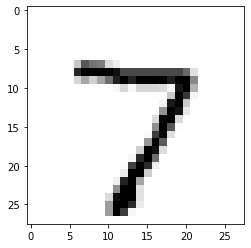

In [13]:
import matplotlib.pyplot
matplotlib.pyplot.imshow(X_test[0].reshape(28,28), cmap='Greys', interpolation='None')


In [14]:
n.query(X_test[0]).argmax()

7

In [15]:
test_data.targets[0]

tensor(7)

## Full data with 1 epoch 

In [16]:
epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in range(len(X_train)):
        n.train(X_train[record], Y_train_final[record])


In [19]:
y_pred_prob = n.query(X_test)

In [20]:
y_pred_prob

array([[0.01500869, 0.02173231, 0.01118435, ..., 0.00648167, 0.01693687,
        0.01969174],
       [0.01008629, 0.00990654, 0.09726093, ..., 0.01036471, 0.01479405,
        0.01288083],
       [0.01498389, 0.05079904, 0.01305865, ..., 0.00822208, 0.0081394 ,
        0.01632935],
       ...,
       [0.09589329, 0.00626054, 0.01528819, ..., 0.01334787, 0.00842086,
        0.00738345],
       [0.01096805, 0.01312592, 0.01236509, ..., 0.01733142, 0.03292849,
        0.00660909],
       [0.01679333, 0.00768117, 0.01681626, ..., 0.02161106, 0.00770212,
        0.01033742]])

In [63]:
y_test_pred = numpy.argmax(y_pred_prob,axis = 0)
accuracy = sum(y_test_pred == y_test) / len(y_test)
accuracy

0.8879

## Learning rate experiement

In [66]:
def experiment(input_nodes=784, hidden_nodes=200, output_nodes=10, learning_rate=0.1, epochs=1):
    n = cs3806_neuralNetwork( input_nodes,hidden_nodes,output_nodes, learning_rate )
    for e in range(epochs):
        # go through all records in the training data set
        for record in range(len(X_train)):
            n.train(X_train[record], Y_train_final[record])
    y_pred_prob = n.query(X_test)
    y_test_pred = numpy.argmax(y_pred_prob,axis = 0)
    accuracy = sum(y_test_pred == y_test) / len(y_test)
    return accuracy

In [68]:
acc_lr_5 = experiment(learning_rate=0.05)
acc_lr_5

0.8729

In [69]:
acc_lr_2 = experiment(learning_rate=0.2)
acc_lr_2

0.9061

In [67]:
acc_lr_3 = experiment(learning_rate=0.3)
acc_lr_3

0.9183

In [70]:
acc_lr_4 = experiment(learning_rate=0.4)
acc_lr_4

0.9254

## Epoch experiment

In [71]:
acc_ep_5 = experiment(epochs=5)
acc_ep_5

0.9346

In [72]:
acc_ep_3 = experiment(epochs=3)
acc_ep_3

0.9221

## Shape experiment

In [73]:
acc_hid_100 = experiment(hidden_nodes=100)
acc_hid_100

0.889

In [74]:
acc_hid_300 = experiment(hidden_nodes=300)
acc_hid_300

0.8818

In [75]:
acc_hid_500 = experiment(hidden_nodes=500)
acc_hid_500

0.88